In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Imola_GP.csv to Imola_GP.csv


In [33]:
df = pd.read_csv('Imola_GP.csv')

In [34]:
df.head()

,Unnamed: 0,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0,0 days 01:03:54.806000,1,NaN,1.0,1.0,0 days 00:25:08.250000,NaN,NaN,0 days 00:00:31.809000,...,100.0,INTERMEDIATE,1.0,True,0 days 01:02:03.225000,Red Bull,VER,24,False,2022-04-24 13:03:03.238
1,1,0 days 01:06:20.801000,1,0 days 00:02:25.995000,2.0,1.0,NaN,NaN,0 days 00:00:54.085000,0 days 00:00:47.410000,...,133.0,INTERMEDIATE,2.0,True,0 days 01:03:54.806000,Red Bull,VER,4,False,2022-04-24 13:04:54.819
2,2,0 days 01:08:37.301000,1,0 days 00:02:16.500000,3.0,1.0,NaN,NaN,0 days 00:00:45.833000,0 days 00:00:46.168000,...,164.0,INTERMEDIATE,3.0,True,0 days 01:06:20.801000,Red Bull,VER,4,False,2022-04-24 13:07:20.814
3,3,0 days 01:11:04.728000,1,0 days 00:02:27.427000,4.0,1.0,NaN,NaN,0 days 00:00:42.546000,0 days 00:00:48.335000,...,101.0,INTERMEDIATE,4.0,True,0 days 01:08:37.301000,Red Bull,VER,4,False,2022-04-24 13:09:37.314
4,4,0 days 01:12:36.178000,1,0 days 00:01:31.450000,5.0,1.0,NaN,NaN,0 days 00:00:29.619000,0 days 00:00:30.801000,...,273.0,INTERMEDIATE,5.0,True,0 days 01:11:04.728000,Red Bull,VER,1,False,2022-04-24 13:12:04.741


In [35]:
import f1_preprocessor
from f1_preprocessor import cleaning

In [36]:
df = cleaning(df)

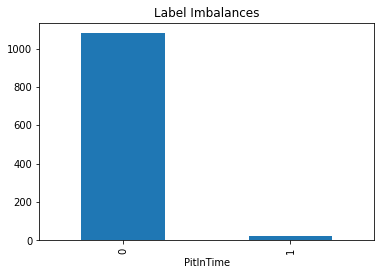

In [43]:
df.pivot_table(index = 'PitInTime', aggfunc = 'size').plot(kind='bar',title='Label Imbalances')
plt.savefig('imola_label_imbalance.png',dpi = 1200)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 1 to 1131
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LapTime      1104 non-null   float64
 1   LapNumber    1104 non-null   float64
 2   Stint        1104 non-null   float64
 3   PitOutTime   1104 non-null   object 
 4   PitInTime    1104 non-null   object 
 5   Sector1Time  1104 non-null   float64
 6   Sector2Time  1104 non-null   float64
 7   Sector3Time  1104 non-null   float64
 8   Compound     1104 non-null   int64  
 9   TyreLife     1104 non-null   float64
 10  Team         1104 non-null   object 
 11  Driver       1104 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 112.1+ KB


In [41]:
df = df.astype({'PitInTime':int}, errors = 'raise')
df = df.astype({'PitOutTime': int}, errors = 'raise')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 1 to 1131
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LapTime      1104 non-null   float64
 1   LapNumber    1104 non-null   float64
 2   Stint        1104 non-null   float64
 3   PitOutTime   1104 non-null   int64  
 4   PitInTime    1104 non-null   int64  
 5   Sector1Time  1104 non-null   float64
 6   Sector2Time  1104 non-null   float64
 7   Sector3Time  1104 non-null   float64
 8   Compound     1104 non-null   int64  
 9   TyreLife     1104 non-null   float64
 10  Team         1104 non-null   object 
 11  Driver       1104 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 112.1+ KB


In [46]:
df.drop(['Team','Driver','Sector3Time'],axis=1,inplace=True)

In [44]:
# USING SMOTE TO POPULATE IMBALANCED DATASET

In [45]:
from imblearn.over_sampling import SMOTE

In [47]:
X=df.drop(['LapTime'],axis=1)
y = df['LapTime']

In [49]:
X_resampled, y_resampled = SMOTE().fit_resample(df[['LapNumber', 'Stint', 'Sector1Time', 'Sector2Time', 'Compound','TyreLife']],df['PitInTime'])

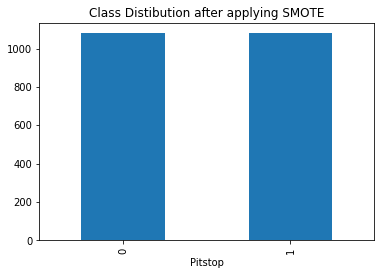

In [51]:
pd.Series(y_resampled).value_counts().plot(kind='bar',title='Class Distibution after applying SMOTE',xlabel='Pitstop')
plt.savefig('imola_label_balanced.png',dpi = 1200)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=101)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train = scaler.fit_transform(X_train)

In [59]:
X_test = scaler.transform(X_test)

In [60]:
from tensorflow.keras.models import Sequential

In [61]:
from tensorflow.keras.layers import Dense,Dropout

In [62]:
X_train.shape

(1510, 6)

In [90]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)

In [93]:
model.fit(x=X_train,y=y_train,epochs=2000,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/2000
48/48 [==============================] - 1s 6ms/step - loss: 0.6949 - val_loss: 0.6849
Epoch 2/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.6799 - val_loss: 0.6758
Epoch 3/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.6639 - val_loss: 0.6511
Epoch 4/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.6374 - val_loss: 0.6280
Epoch 5/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.6161 - val_loss: 0.6102
Epoch 6/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.5987 - val_loss: 0.5963
Epoch 7/2000
48/48 [==============================] - 0s 4ms/step - loss: 0.5844 - val_loss: 0.5850
Epoch 8/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.5729 - val_loss: 0.5739
Epoch 9/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.5619 - val_loss: 0.5646
Epoch 10/2000
48/48 [==============================] - 0s 5ms/step - loss: 0.5509 - val_loss: 0.5535

In [94]:
losses = pd.DataFrame(model.history.history)

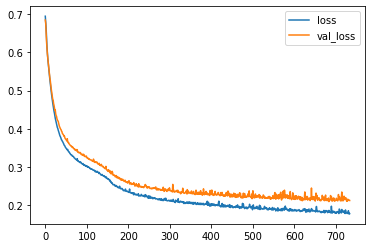

In [108]:
losses.plot()
plt.savefig('loss.png',dpi = 1200)

In [96]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       325
           1       0.88      0.93      0.91       323

    accuracy                           0.90       648
   macro avg       0.91      0.90      0.90       648
weighted avg       0.91      0.90      0.90       648



In [100]:
print(confusion_matrix(y_test,predictions))

[[284  41]
 [ 21 302]]


In [103]:
(284+302) / (41+21 + 284 + 302)

0.904320987654321